# Overview

The model works on a small portion of data divided into train and test datasets.

Each of these datasets consists of 198 images that are categorized into 33 classes.

Each image has a total of 784 pixels (28 x 28), and each pixel value is an integer between 0 and 255.

# Importing Data

In [223]:
import pandas as pd # For data manipulation
import numpy as np # To perform different operations
import matplotlib.pyplot as plt # For plotting and data visualization

#1. read csv files and create dataframes
train_df = pd.read_csv('input/train.csv',sep=',')
test_df = pd.read_csv('input/test.csv',sep=',')
#2. Create arrayes from the files and assign them to training testing variables
trainingArr = np.array(train_df, dtype = 'float32')
testingArr = np.array(test_df, dtype='float32')

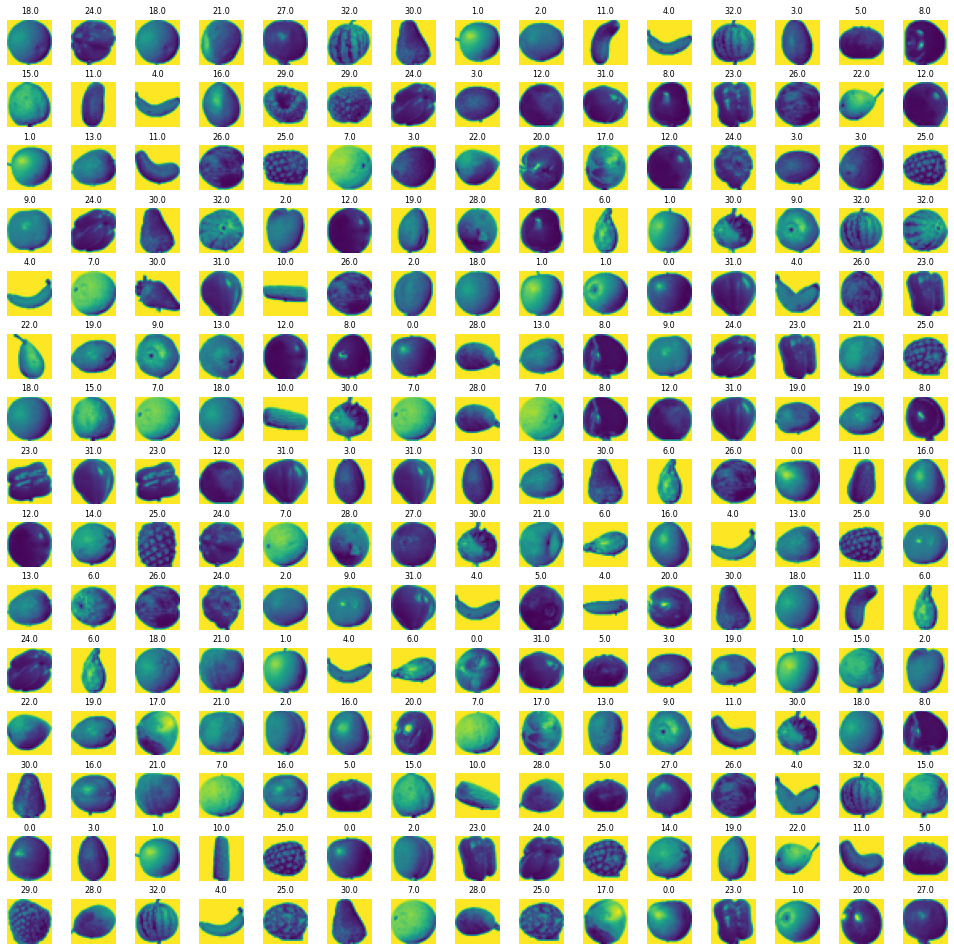

In [219]:
# Display some images for manual testing
# This code was copied from the boilerplate code for Lab 7 in DIT821
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off') # just to avoid showing the pixels around the images because we gonna present many images

plt.subplots_adjust(hspace=0.4)

# Model Training

In [224]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

#1. Split training and testing data into x (pixels) and y (labels)
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [165]:
#2. Create validation dataset
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.3, random_state = 12345)


In [166]:
#3. Reshape the data for CNN so the input us in the correct shape
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [222]:
#4. Build the CNN model using keras
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation="relu")) #Convulotional layer with 32 filters
model.add(MaxPooling2D(pool_size=(2, 2))) #Add max pooling layer

model.add(Conv2D(64, (3, 3), padding="same", activation="relu")) #Convulotional layer with 64 filters
model.add(MaxPooling2D(pool_size=(2, 2))) #Add max pooling layer

model.add(Dropout(0.2)) #Dropout for regulariztion

model.add( Flatten() ) #Flatten input into a vector to be accepted in ANN

model.add( Dense(64, activation="relu") ) #Apply relu acivation function (Non-linearity)
model.add( Dense(33, activation="sigmoid") ) #Apply sigmoid activation function

model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"]) #Configure model for training

model.fit(X_train, y_train, batch_size=6, epochs=24) #Train the model for 24 epochs

Epoch 1/24
23/23 [==============================] - 1s 7ms/step - loss: 3.5343 - accuracy: 0.0145
Epoch 2/24
23/23 [==============================] - 0s 7ms/step - loss: 3.4681 - accuracy: 0.0870
Epoch 3/24
23/23 [==============================] - 0s 7ms/step - loss: 3.3162 - accuracy: 0.1449
Epoch 4/24
23/23 [==============================] - 0s 8ms/step - loss: 3.0223 - accuracy: 0.1449
Epoch 5/24
23/23 [==============================] - 0s 7ms/step - loss: 2.6331 - accuracy: 0.2464
Epoch 6/24
23/23 [==============================] - 0s 7ms/step - loss: 2.2047 - accuracy: 0.3261
Epoch 7/24
23/23 [==============================] - 0s 7ms/step - loss: 1.8052 - accuracy: 0.4710
Epoch 8/24
23/23 [==============================] - 0s 7ms/step - loss: 1.4402 - accuracy: 0.5217
Epoch 9/24
23/23 [==============================] - 0s 7ms/step - loss: 1.2827 - accuracy: 0.5797
Epoch 10/24
23/23 [==============================] - 0s 7ms/step - loss: 1.0356 - accuracy: 0.7101
Epoch 11/24
23/23 [

# Model Evaluation

In [204]:
#Evaluate model using keras
score = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 1.5667 - accuracy: 0.7475


# Prediction

In [221]:
prediction = model.predict(X_test) # Makes predicitons for each example in the test dataset
predicted_classes=np.argmax(prediction,axis=1) # Returns the best prediciton for each example

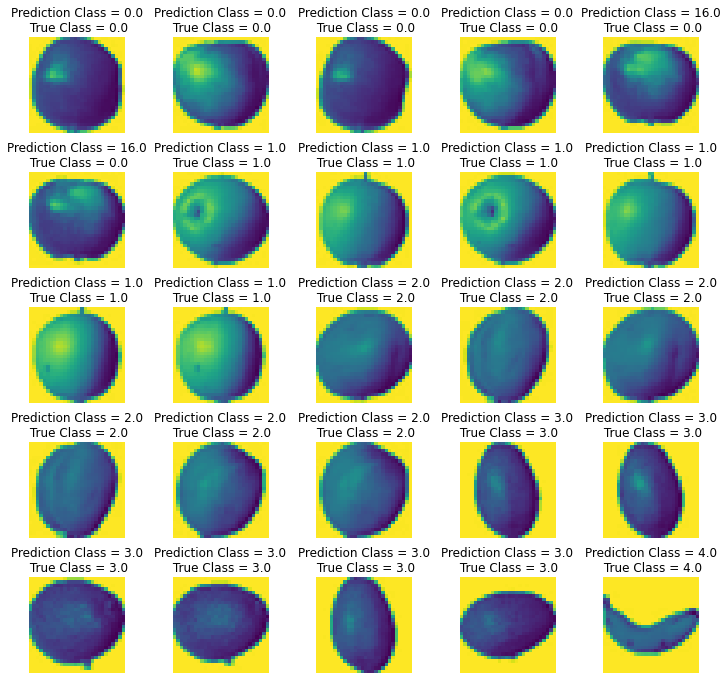

In [218]:
#Visualization of images along with their true and prectied class
# This code was copied from the boilerplate code for Lab 7 in DIT821
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)